# Лабораторная работа №1 по Линейной алгеьре
Выполнила: Капустина Юлия, J3110

In [1]:
from pca_ver3 import *
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Math-Students.csv')
df = df.select_dtypes(include=['number'])
df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10


In [3]:
values = df.values.tolist()  # преобразуем в список списков
n, m = df.shape
values_float = [[float(x) for x in row] for row in values]
matr = Matrix(n, m, values_float)

### Вывод собственных векторов

In [4]:
centred_X = center_data(matr)
cov_X = covariance_matrix(centred_X)
eigen_num, eigen_vec = qr_algorithm(cov_X)
print(eigen_num)

[63.89636766023603, 42.16254089018172, 3.0111108903961448, 2.5020813359374854, 2.072039726447659, 1.9141439446232478, 1.4526348744528814, 1.2366571665279784, 1.0455593770126985, 0.7961537595173986, 0.6571447653233004, 0.5829192414394387, 0.4452958838848084, 0.4196436678823404, 0.38232407717416644, 0.32246461450581093]


Сравнение собственных значений с результатами numpy

In [5]:
A = np.array(cov_X.values)
evalues, evectors = np.linalg.eig(A)
print(evalues)

[63.89636766 42.16254089  3.01111089  2.50208134  2.07203973  1.91414394
  1.45263487  1.23665717  1.04555938  0.79615376  0.65714477  0.58291924
  0.32246461  0.38232408  0.41964367  0.44529588]


Сравнение собственных векторов с numpy

In [6]:
print(eigen_vec.values[0])
print(evectors[0])

[0.027030464402051837, -0.031201867084572416, 0.13536317366405112, 0.33326653580158694, 0.38060536511455506, -0.03732783506349852, 0.44240637391203064, 0.695160749582776, 0.09773888964734803, -0.057816904752047676, 0.11385960517305521, -0.011117007456340918, 0.038809855774409735, -0.07708519785615357, -0.09956098321546816, -0.01833961749560411]
[ 0.02703046 -0.03120187 -0.13536317 -0.33326654  0.38060723 -0.03730884
  0.44240638 -0.69516075  0.09773888 -0.0578169  -0.11385961 -0.01111693
 -0.01833962  0.09956281 -0.07707965  0.0388162 ]


### Применение РСА

In [7]:
X_proj, V, ev = pca(matr, 4)
ev

0.9078351040062099

Вывод первых значений новых компонент(для первых 5 наблюдений)

In [8]:
for i in range(5):
    print(X_proj.values[i])

[5.739721909524216, -3.7649876978825407, 4.619712686913093, -7.307044531349975]
[5.4335497455134725, -2.5078855136607032, 3.26887826257274, -6.1539240138802125]
[4.6039096728588875, -5.336353017461142, 6.537338839788479, -12.431674317692549]
[2.192328255757385, -3.596168588991266, 2.8142615872954115, -11.639777049090641]
[4.518073637055462, -4.7420294775893925, 5.646249768102164, -7.082230395065571]


Вывод значений восстановленной матрицы

In [18]:
recon = calc_recon_matrix(matr, X_proj, V)
print("Восстановленная матрица")
for i in range(5):
    print(recon.values[i])

Восстановленная матрица
[16.815988099659965, 2.4421254828647214, 3.228377058321053, 3.6012357292579837, 6.215210931486683, -1.1243760278266839, 5.921857113333273, 6.341616395514977, 3.57549382630638, 1.3444364887138396, 2.6558294776153613, 4.21975336492212, 7.655759253296354, 9.068239318766908, 11.26685672955721, 10.914747491837227]
[16.823883362939092, 2.498653746199065, 3.215283714141288, 3.4174720358036135, 5.432379017176782, -0.6986024781154077, 5.977497995660048, 6.423102567239194, 3.5733636629471444, 1.2953268163574687, 2.7164333021234364, 3.9811967923584706, 7.049089384319939, 9.548943984381612, 10.909483890317222, 10.706985251699203]
[16.765072678255226, 2.4188465088566105, 3.0391913246393614, 3.324865159223383, 6.61578455496197, -1.599905532478351, 5.180501677828897, 5.184140911954294, 3.4297376188595803, 1.4936194760229666, 2.4071767044959813, 4.534828172773716, 8.355156886497678, 8.5844189877774, 11.864755034648734, 11.202297397886362]
[16.722272074221696, 2.559119183777319,

In [19]:
print("Изначальная матрица")
for i in range(5):
    print(matr.values[i])

Изначальная матрица
[18.0, 4.0, 4.0, 2.0, 2.0, 0.0, 4.0, 3.0, 4.0, 1.0, 1.0, 3.0, 6.0, 5.0, 6.0, 6.0]
[17.0, 1.0, 1.0, 1.0, 2.0, 0.0, 5.0, 3.0, 3.0, 1.0, 1.0, 3.0, 4.0, 5.0, 5.0, 6.0]
[15.0, 1.0, 1.0, 1.0, 2.0, 3.0, 4.0, 3.0, 2.0, 2.0, 3.0, 3.0, 10.0, 7.0, 8.0, 10.0]
[15.0, 4.0, 2.0, 1.0, 3.0, 0.0, 3.0, 2.0, 2.0, 1.0, 1.0, 5.0, 2.0, 15.0, 14.0, 15.0]
[16.0, 3.0, 3.0, 1.0, 2.0, 0.0, 4.0, 3.0, 2.0, 1.0, 2.0, 5.0, 4.0, 6.0, 10.0, 10.0]


Провекрка работы функций

In [11]:
X_proj_t, ev, er = apply_pca_to_dataset('Math-Students.csv', 3)
print('Доля объяснённой дисперсии ', ev, '\nСреднеквадратическая ошибку восстановления данных ', er)

Доля объяснённой дисперсии  0.8874762754636885 
Среднеквадратическая ошибку восстановления данных  9.479935241843748


In [12]:
a, b, c = add_noise_and_compare(matr)
print('Доля объяснённой дисперсии для шумной и не шумной матрицы ', a)
print('Косинусное сходство собственных векторов \n', b)
print('Среднеквадратическая ошибку восстановления данных ', c)

Доля объяснённой дисперсии для шумной и не шумной матрицы  [0.9520894504384441, 0.9517166871950019]
Косинусное сходство собственных векторов 
 [0.9878056318908932, 0.9885784309274824, 0.9881916333417727, 0.9902812384838373, 0.9855106974599588, 0.9956222166502253, 0.9745056126432747, 0.9896346451881148, 0.9915343593223304, 0.9886377164122241, 0.9837468730271016, 0.9947465598718803, 0.9999850052528525, 0.9893154050474395, 0.9742607493843214, 0.9921749925695411]
Среднеквадратическая ошибку восстановления данных  [22.05664838352118, 22.239365630507987]


Визуализация PCA

In [13]:
X_proj, V, ev = pca(matr, 2)

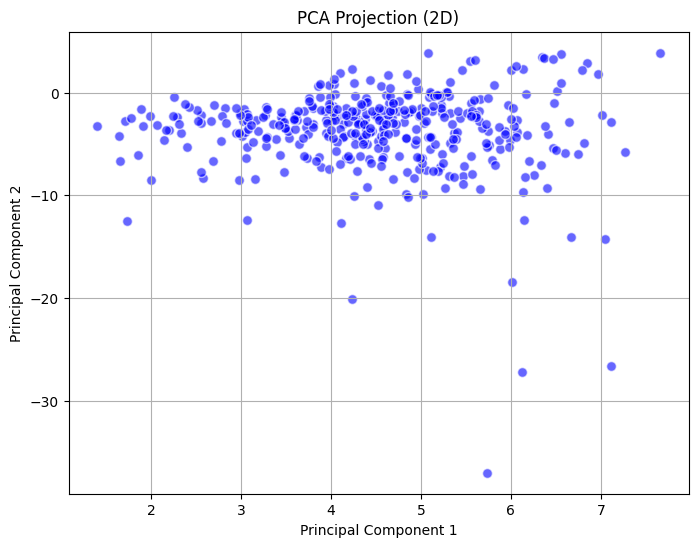

In [14]:
plot_pca_projection(X_proj)
plt.show()

# Expert lvl
**Утверждение:**
Оптимальные направления PCA совпадают с собственными векторами матрицы ковариаций


**Док-во:**
### 1. Дисперсия
PCA ищет такие ортогональные направления в данных, которые:
- Максимизируют дисперсию проекций 
- Для последующих компонент сохраняют условие ортогональности к предыдущим

В методе главных компонент (PCA) мы работаем с дисперсией проекций данных на направляющий вектор v.
Так как PCA данные предварительно центрируются (вычитается среднее по каждому признаку):
Среднее значение проекций равно нулю:
   $$
   \frac{1}{n}\sum_{i=1}^n (\mathbf{x}_i \cdot \mathbf{v}) = 0
   $$
   
   Cреднее значение равно нулю. Тогда дисперсию можно вычислить как:

   $$
   \text{Var}(\mathbf{Xv}) = \frac{1}{n-1}\sum_{i=1}^n (\mathbf{x}_i \cdot \mathbf{v})^2
   $$

Составим вектор проекций всех точек:
   $$
   \mathbf{Xv} \quad \text{(размер } n \times 1\text{)}
   $$

Тогда квадраты проекций:
   $$
   (\mathbf{Xv})^2 = (\mathbf{Xv})^T (\mathbf{Xv}) = \mathbf{v}^T \mathbf{X}^T \mathbf{X} \mathbf{v}
   $$

Усреднение даёт выражение для дисперсии:
   $$
   \text{Var}(\mathbf{Xv}) = \frac{1}{n-1}\sum_{i=1}^n (\mathbf{x}_i \cdot \mathbf{v})^2 = \frac{1}{n-1}\mathbf{v}^T \mathbf{X}^T \mathbf{X} \mathbf{v} = \mathbf{v}^T \mathbf{C} \mathbf{v}
   $$
   где $\mathbf{C} = \frac{1}{n-1}\mathbf{X}^T \mathbf{X}$ — матрица ковариаций.

### 2. Спектрально разложение
Воспользуемся теоремой о спектральном разложении:

Любая симметричная матрица **C** может быть представлена как:
$$
\mathbf{C} = \mathbf{V} \mathbf{\Lambda} \mathbf{V}^T
$$
где:
- $\mathbf{V}$ - матрица собственных векторов (ортогональная)
- $\mathbf{\Lambda}$ - диагональная матрица собственных значений

Введём новый вектор:
$$
\mathbf{u} = \mathbf{V}^T \mathbf{v} \quad \Rightarrow \quad \mathbf{v} = \mathbf{V} \mathbf{u}
$$
При этом условие нормировки сохраняется:
$$
\|\mathbf{v}\|^2 = \mathbf{v}^T \mathbf{v} = \mathbf{u}^T \mathbf{V}^T \mathbf{V} \mathbf{u} = \mathbf{u}^T \mathbf{u} = 1
$$


Квадратичная форма преобразуется:
$$
\mathbf{v}^T \mathbf{C} \mathbf{v} = \mathbf{u}^T \mathbf{V}^T \mathbf{V} \mathbf{\Lambda} \mathbf{V}^T \mathbf{V} \mathbf{u} = \mathbf{u}^T \mathbf{\Lambda} \mathbf{u} = \sum_{i=1}^d \lambda_i u_i^2
$$


Теперь задача принимает вид:
$$
\max \sum_{i=1}^d \lambda_i u_i^2 \quad \text{при} \quad \sum_{i=1}^d u_i^2 = 1
$$

Решение:
1. Максимум достигается, когда весь "вес" сосредоточен на максимальном $\lambda_i$
2. Пусть $\lambda_1$ - наибольшее собственное значение
3. Тогда оптимальное решение: $u_1 = \pm 1$, $u_i = 0$ для $i > 1$


Соответствующий вектор $\mathbf{v}$:
$$
\mathbf{v} = \mathbf{V} \mathbf{u} = \mathbf{v}_1
$$
где $\mathbf{v}_1$ - собственный вектор, соответствующий $\lambda_1$

### 3. Вывод:
1. **Максимизация дисперсии**:  
   Первая главная компонента соответствует собственному вектору с наибольшим λ

2. **Ортогональность компонент**:  
   Собственные векторы симметричной матрицы **C** всегда ортогональны

3. **Объясненная дисперсия**:  
   Собственные значения λ_i показывают вклад каждой компоненты



In [25]:
print()

 ### (Заметки для меня не для проверки)
 
 **Формулировка теоремы**


 
Для любой симметричной матрицы **A** ∈ ℝⁿˣⁿ существует ортогональная матрица **V** и диагональная матрица **Λ**, такие что:
$$
\mathbf{A} = \mathbf{V} \mathbf{\Lambda} \mathbf{V}^T
$$
где столбцы **V** - собственные векторы **A**, а **Λ** содержит собственные значения.

**Доказательство (конструктивное)**

**1. Существование собственных векторов**

По **основной теореме алгебры**, характеристическое уравнение:
$$
\det(\mathbf{A} - \lambda \mathbf{I}) = 0
$$
имеет n корней (с учётом кратности). Для каждого λᵢ решаем:
$$
(\mathbf{A} - \lambda_i \mathbf{I})\mathbf{v}_i = 0
$$

**2. Ортогональность собственных векторов**

**Лемма**: Собственные векторы, соответствующие различным λ, ортогональны.

*Доказательство*:
Пусть **Av₁** = λ₁**v₁** и **Av₂** = λ₂**v₂**, λ₁ ≠ λ₂. Тогда:
$$
λ₁**v₁**ᵀ**v₂** = (**Av₁**)ᵀ**v₂** = **v₁**ᵀ**A**ᵀ**v₂** = **v₁**ᵀ**A**v₂ = λ₂**v₁**ᵀ**v₂**
$$
Отсюда (λ₁ - λ₂)**v₁**ᵀ**v₂** = 0 ⇒ **v₁**ᵀ**v₂** = 0.

***3. Приведение к диагональному виду***

1. Строим матрицу **V** = [**v₁**|...|**vₙ**] из ортонормированных собственных векторов
2. Тогда:
   $$
   \mathbf{AV} = \mathbf{V\Lambda}
   $$
3. Умножая справа на **V**ᵀ:
   $$
   \mathbf{A} = \mathbf{V\Lambda V}^T
   $$
